In [1]:
import numpy
numpy.loadtxt("pliczki/lznk_dane1.csv", delimiter=",")

array([[ 0.        ,  3.46903117],
       [ 0.05050505,  1.9687209 ],
       [ 0.1010101 ,  3.37885009],
       [ 0.15151515,  2.00792486],
       [ 0.2020202 ,  3.29332553],
       [ 0.25252525,  1.91119751],
       [ 0.3030303 ,  3.82837318],
       [ 0.35353535,  2.15330473],
       [ 0.4040404 ,  3.37142657],
       [ 0.45454545,  1.70603088],
       [ 0.50505051,  6.23308908],
       [ 0.55555556,  4.2403636 ],
       [ 0.60606061,  2.88591081],
       [ 0.65656566,  3.97923175],
       [ 0.70707071,  4.14595358],
       [ 0.75757576,  5.35173463],
       [ 0.80808081,  4.71513479],
       [ 0.85858586,  5.87168705],
       [ 0.90909091,  4.49544429],
       [ 0.95959596,  5.51724276],
       [ 1.01010101,  1.72616082],
       [ 1.06060606,  6.18254872],
       [ 1.11111111,  4.20102597],
       [ 1.16161616,  5.12546462],
       [ 1.21212121,  4.66624839],
       [ 1.26262626,  7.13389636],
       [ 1.31313131,  6.12430802],
       [ 1.36363636,  5.09436073],
       [ 1.41414141,

# Zadanie 8.1
Znajdź rozwiązanie w sensie liniowego zadania najmniejszych kwadratów $x = [x_1, x_2, x_3] \in \mathbb{R}^3$ dla układu: 
$$ \begin{cases} 
x_1+x_3 & = 4 \\
x_2 + x_3 & = 3 \\
x_1 + x_2 & = 5 \\
x_1 + 2x_2 + 3x_3 & = 11 \\
2x_1 + 3x_2 & = 7
\end{cases} $$
Określ, na ile lewe strony wszystkich tych równań, po wstawieniu znalezionego $x$, różnią się od wartości po prawej stronie 


In [2]:
A = numpy.array([[1, 0, 1], 
                 [0, 1, 1],
                 [1, 2, 0],
                 [1, 2, 3],
                 [2, 3, 0]])
b = numpy.array([4, 3, 5, 11, 7])

In [3]:
x_approx = numpy.linalg.lstsq(A, b, rcond=0)[0]
print("Obliczone x:", x_approx)
print("Różnica prawej i lewej strony:", A@x_approx-b)

Obliczone x: [1.83255814 1.24651163 2.17674419]
Różnica prawej i lewej strony: [ 0.00930233  0.42325581 -0.6744186  -0.14418605  0.40465116]


# Zadanie 8.2
Niech będzie dany wektor $x = [x_1, x_2, . . . , x_n] \in \mathbb{R}^n$. Niech $A$ będzie macierzą postaci
$$ A = \begin{bmatrix} x_1^k & ... & x_1 & 1 \\ x_2^k & ... & x_2 & 1 \\ ... & ... & ... & ... \\ x_n^k & ... & x_n & 1 \\ \end{bmatrix}$$
Macierz tego rodzaju nazywamy macierzą Vandermonde’a. Napisz procedurę, która dla podanego $x$ w postaci zmiennej typu `numpy.array` oraz $k$
wygeneruje i zwróci macierz tej postaci.

In [4]:
x = numpy.array([5, 2, 3, 4])
Vandermonde = lambda X, k: numpy.array([[x_i**j for j in range(k, -1, -1)] for x_i in X])
Vandermonde(x, 4)

array([[625, 125,  25,   5,   1],
       [ 16,   8,   4,   2,   1],
       [ 81,  27,   9,   3,   1],
       [256,  64,  16,   4,   1]])

# Zadanie 8.3. 
Niech $y = [a, b, c]$ będzie danym wektorem. Zauważmy, że działając operatorem $A$ z zadania `8.2` dla $k = 2$ na wektor $y$ otrzymamy wartości  funkcji $w(x) = ax^2 + bx + c$ dla kolejnych argumentów wektora $x$, tj. $Ay = [ax^2_i + bx_i + c]^n_{i=1}.\\$
Wygeneruj macierz $A$ dla odpowiedniego $x$, $k$ oraz $y$ i wykonaj wykres funkcji $w(x) = x^2 + 1$
na przedziale [−1, 1]. Porównaj wykres z wykresem uzyskanym zwykłym sposobem (operacje element-wise). Czy wykresy różnią się od siebie?

In [5]:
k = 2
y = [1, 0, 1]
X = numpy.linspace(-1, 1, 1000)
A = Vandermonde(X, k)@y

zwykly_sposob = lambda x: x**2 + 1
y_zwykle = zwykly_sposob(X)

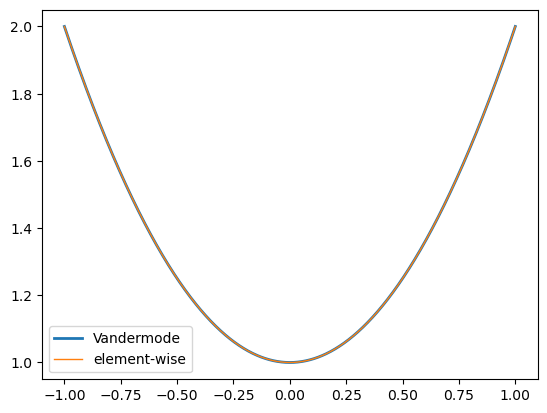

In [6]:
import matplotlib.pyplot as plt
plt.plot(X, A, label="Vandermode", lw="2")
plt.plot(X, y_zwykle, label="element-wise", lw="1")
plt.legend()
plt.show()

# Zadanie 8.4. 
W pliku `lznk_dane1.csv` zostały zapisane zaburzone wartości pewnej funkcji liniowej $f (x) = ax + b$. Określ możliwie dokładnie $a$ i $b$ korzystając z LZNK oraz macierzy z `zadania 8.2`.

In [7]:
file = numpy.loadtxt("pliczki/lznk_dane1.csv", delimiter=",")
x, y = file.transpose()
A = Vandermonde(x, 1)
ab = numpy.linalg.lstsq(A, y, rcond=0)[0]
print(ab)

[2.952025   2.20147725]


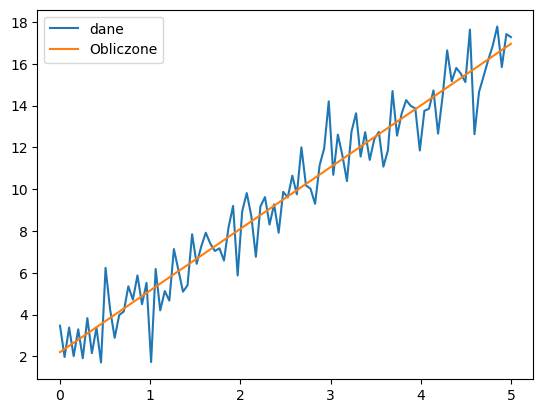

In [8]:
okreslona_funkcja = lambda n: ab[0]*n + ab[1]
plt.plot(x, y, label="dane")
plt.plot(x, okreslona_funkcja(x), label="Obliczone")
plt.legend()
plt.show()

# Zadanie 8.5
W pliku `lznk_dane2.csv` zostały zapisane zaburzone wartości pewnej paraboli.
Określ jej współczyniki

In [9]:
file = numpy.loadtxt("pliczki/lznk_dane2.csv", delimiter=",")
x, y = file.transpose()

calculate = lambda iksy, igreki, k: numpy.linalg.lstsq(Vandermonde(iksy, k), igreki, rcond=0)[0]

# odp:
f_2 = calculate(x, y, 2)
print(f_2)

[0.99692997 2.02494656 0.91494812]


In [10]:
graph_2 = Vandermonde(x, 2)@f_2

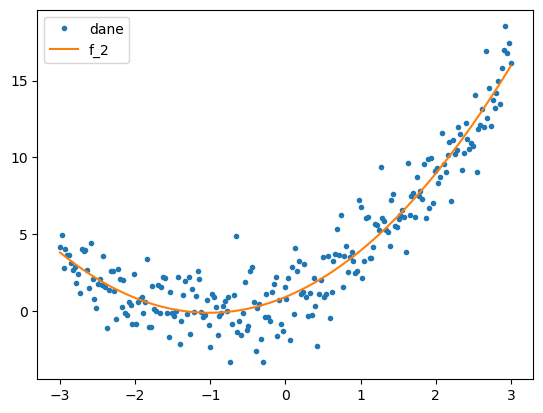

In [11]:
plt.plot(x, y, label="dane", marker = ".", linestyle="")
plt.plot(x, graph_2, label="f_2")
plt.legend()
plt.show()

# Zadanie 8.6. 
W plikach `lznk_dane3.csv` oraz `lznk_dane4.csv` zostały zapisane zaburzone
wartości pewnych wielomianów niskiego stopnia. Odgadnij ich stopień oraz określ współczynniki.

In [45]:
def find_polynomial(path: str) -> (int, [float], float):
    file = numpy.loadtxt(path, delimiter=",")
    x_input, y_input = file.transpose()
    errors = {}
    polynomials = {}
    for n in range(500):
        A = Vandermonde(x_input, n)
        y = numpy.linalg.lstsq(A, y_input, rcond=0)[0]
        avg_error = numpy.average([abs(i) for i in A@y-y_input])
        errors.update({n: avg_error})
        polynomials.update({n: y})
    lowest_error = min(errors, key=errors.get)
    return lowest_error, polynomials[lowest_error], errors[lowest_error]

In [46]:
pol_3 = find_polynomial("pliczki/lznk_dane3.csv")
file_3 = numpy.loadtxt("pliczki/lznk_dane3.csv", delimiter=",")
x_input_3, y_input_3 = file_3.transpose()
pol_3

KeyboardInterrupt: 

In [39]:
pol_4 = find_polynomial("pliczki/lznk_dane4.csv")
file_4 = numpy.loadtxt("pliczki/lznk_dane4.csv", delimiter=",")
x_input_4, y_input_4 = file_4.transpose()
pol_4

(11,
 array([-3.08614587e-05,  2.16771998e-03, -6.75652734e-02,  1.23162661e+00,
        -1.45662568e+01,  1.17178847e+02, -6.53299426e+02,  2.52075777e+03,
        -6.58716862e+03,  1.10747611e+04, -1.07076456e+04,  4.43457422e+03]),
 1.5705340452530363)

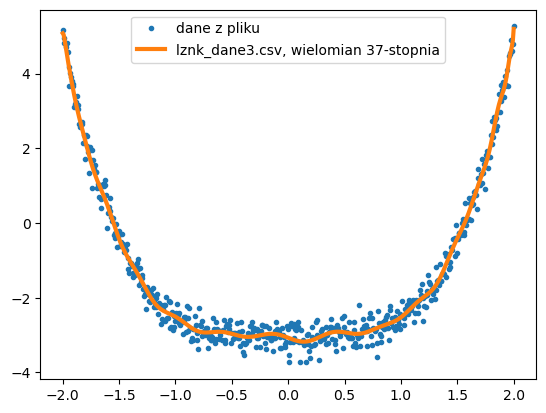

In [40]:
plt.plot(x_input_3, y_input_3, marker=".", linestyle="", label="dane z pliku")
plt.plot(x_input_3, Vandermonde(x_input_3, pol_3[0])@pol_3[1], label=f"lznk_dane3.csv, wielomian {pol_3[0]}-stopnia", lw="3")
plt.legend()
plt.show()

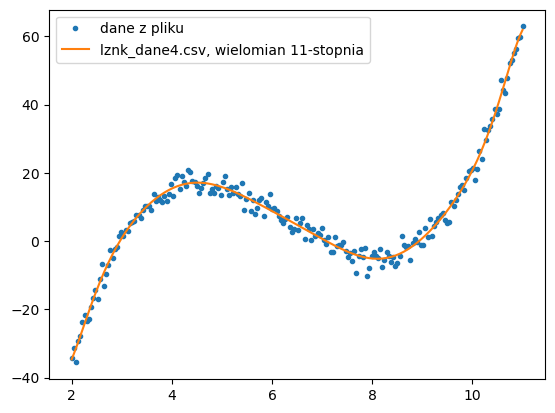

In [41]:
plt.plot(x_input_4, y_input_4, marker=".", linestyle="", label="dane z pliku")
plt.plot(x_input_4, Vandermonde(x_input_4, pol_4[0])@pol_4[1], label=f"lznk_dane4.csv, wielomian {pol_4[0]}-stopnia")
plt.legend()
plt.show()